In [1]:
# Loading libraries
import re
import time
import pandas as pd
from tqdm.auto import tqdm
from collections import Counter
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from gensim.models import Word2Vec



In [2]:
# Loading NLTk data for data cleaning
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aayushbhasin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aayushbhasin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aayushbhasin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

i have taken this dataset from kaggle from datasets NLP section.

In [3]:
# Loading the dataset
df = pd.read_csv("examiner-date-text.csv")
df.head()

,publish_date,headline_text
0,20100101,100 Most Anticipated books releasing in 2010
1,20100101,10 best films of 2009 - What's on your list?
2,20100101,10 days of free admission at Lan Su Chinese Ga...
3,20100101,10 PlayStation games to watch out for in 2010
4,20100101,10 resolutions for a Happy New Year for you an...


As obviously now i will clean the data to remove the punctuations because that do not contribute towards vocabulary and it will help our model to be more accurate...

In [4]:
# Removing na values from dataframe
def data_na_value_cleaning(data):
    print("\nBefore cleaning, Data Shape : ", data.shape)
    print("\nBefore removing Null values: -------")
    print(data.isna().sum())
    data.dropna(inplace=True)
    data.reset_index(inplace=True,drop=True)
    
    print("After removing Null values: -----")
    print(data.isna().sum())
    print("\nAfter cleaning, Data Shape : ", data.shape)
    
    return data

In [5]:
# Removing duplicate values
def duplicate_content_removal(data, col, ini_row):                                
    print("\nBefore removing duplicates, number of data was : ", ini_row)
    duplicate_count = data[col].duplicated().sum()
    print("\nNumber of Duplicates: ", duplicate_count)

    description_data = data[col].drop_duplicates()
    cleaned_row = len(description_data)
    
    if (ini_row - cleaned_row) > 0:
        print("\nTotal data reduction : ", (ini_row - cleaned_row))
        print("\nAfter removing duplicates, number of data is :", cleaned_row)
    else:
        print("\nDataset doesn't content any duplicate data.")
    
    return list(description_data)

In [6]:
df = data_na_value_cleaning(df)


Before cleaning, Data Shape :  (3089781, 2)

Before removing Null values: -------
publish_date      0
headline_text    16
dtype: int64
After removing Null values: -----
publish_date     0
headline_text    0
dtype: int64

After cleaning, Data Shape :  (3089765, 2)


In [7]:
headline_text = duplicate_content_removal(df, 'headline_text', df.shape[0])


Before removing duplicates, number of data was :  3089765

Number of Duplicates:  28613

Total data reduction :  28613

After removing duplicates, number of data is : 3061152


In [8]:
#fucntion for cleaning the column headline_text
def clean_text(text ): 
    delete_dict = {sp_character: ' ' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower().split(' ')

In [9]:
sent_corpus = df['headline_text'].apply(clean_text)

In [12]:
# Sentence words stats
len_count = []
for l in sent_corpus:
    len_count.append(len(l))

In [13]:
# data after cleaning and preprocessing
print(sent_corpus[0])

['most', 'anticipated', 'books', 'releasing']


In [15]:
#  creating a fucntion for Time calculation
def cal_elapsed_time(s):
    return print("Elapsed time:\t", round((time.time() - s),2))
s_time = time.time()
cal_elapsed_time(s=s_time)

Elapsed time:	 0.0


In [16]:
from gensim.models import Word2Vec


In [17]:
s_time = time.time()
print("Model Training Started...")
model = Word2Vec(sentences=sent_corpus, size=400, window=4, min_count=3, workers=4)
cal_elapsed_time(s_time)

Model Training Started...
Elapsed time:	 249.22


In [18]:
print("Total number of unique words loaded in Model : ", len(model.wv.vocab))

Total number of unique words loaded in Model :  103676


In [21]:
# Saving the model
model.save("internship_project_wv.model")

In [22]:
# Loading the model
model = Word2Vec.load("internship_project_wv.model")

now i will perform simple tasks to evaluate the model.

In [25]:
# Find similar words for efficiency
model.wv.most_similar("hotel", topn=10)

[('hotels', 0.6454163789749146),
 ('suites', 0.6237071752548218),
 ('marriott', 0.5898282527923584),
 ('hyatt', 0.5585928559303284),
 ('resort', 0.5553494095802307),
 ('regency', 0.5524495244026184),
 ('fairmont', 0.5524280071258545),
 ('westin', 0.5517177581787109),
 ('loews', 0.5507307052612305),
 ('kimpton', 0.546318769454956)]

In [26]:
# Get vector form of word 
model.wv.get_vector('brilliant')

array([ 1.38605088e-01, -1.26080394e-01,  1.22755311e-01, -1.70784026e-01,
       -2.29957402e-01, -3.75118494e-01,  1.06898852e-01,  9.15471315e-02,
       -9.90748480e-02, -1.17312722e-01,  4.80978936e-03, -2.84435600e-01,
       -1.48612082e-01, -1.14980467e-01, -2.67315894e-01,  4.53493267e-01,
        2.25321785e-01, -8.16238523e-02, -2.64737040e-01,  5.01340628e-01,
        3.05340350e-01, -1.07813939e-01, -3.82084221e-01, -3.07226032e-01,
       -8.38763192e-02, -2.66118824e-01,  3.36346328e-01,  2.93497175e-01,
       -3.74041637e-03, -1.45536944e-01, -3.35024089e-01,  4.08376120e-02,
        2.26235002e-01,  8.31107274e-02, -2.56509513e-01,  7.57846832e-02,
        3.74291360e-01,  5.65462001e-03, -3.02452266e-01,  1.40183987e-02,
        1.86790060e-02,  2.52628833e-01, -7.67040789e-01,  5.30755259e-02,
       -1.27596349e-01, -8.85891542e-02,  7.65995011e-02, -4.34740067e-01,
        3.64379324e-02, -2.87145674e-01,  1.25751927e-01,  6.41994178e-02,
        2.38162324e-01, -

In [27]:
#vector form of word
print("Shape of the vector : ", model.wv.get_vector('brilliant').shape)

Shape of the vector :  (400,)


In [28]:
# evaluating distance between two words
model.wv.distance("male", "female")

0.3157827854156494

In [29]:
# evaluating distance between two words
model.wv.distance("hotel", "house")

0.7970190346240997

In [30]:
# Odd one out from list of words
model.wv.doesnt_match(["paris", "india","china","france"])

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'paris'

In [33]:
# evaluating word pair
model.wv.evaluate_word_pairs('SimLex-999_2.txt',)

((-0.10631673837560765, 0.7422644123216866),
 SpearmanrResult(correlation=-0.2657342657342658, pvalue=0.40383308831471165),
 0.0)

In [34]:
model.wv.evaluate_word_analogies('questions-words.txt')

(0.21925607287449392,
 [{'section': 'capital-common-countries',
   'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
    ('BAGHDAD', 'IRAQ', 'HANOI', 'VIETNAM'),
    ('BAGHDAD', 'IRAQ', 'KABUL', 'AFGHANISTAN'),
    ('BAGHDAD', 'IRAQ', 'MOSCOW', 'RUSSIA'),
    ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
    ('BANGKOK', 'THAILAND', 'CAIRO', 'EGYPT'),
    ('BEIJING', 'CHINA', 'CAIRO', 'EGYPT'),
    ('BEIJING', 'CHINA', 'HANOI', 'VIETNAM'),
    ('BEIJING', 'CHINA', 'MOSCOW', 'RUSSIA'),
    ('BEIJING', 'CHINA', 'TOKYO', 'JAPAN'),
    ('BEIJING', 'CHINA', 'BANGKOK', 'THAILAND'),
    ('BERLIN', 'GERMANY', 'BANGKOK', 'THAILAND'),
    ('BERN', 'SWITZERLAND', 'OSLO', 'NORWAY'),
    ('BERN', 'SWITZERLAND', 'BANGKOK', 'THAILAND'),
    ('BERN', 'SWITZERLAND', 'BERLIN', 'GERMANY'),
    ('CAIRO', 'EGYPT', 'BANGKOK', 'THAILAND'),
    ('CAIRO', 'EGYPT', 'BERLIN', 'GERMANY'),
    ('CANBERRA', 'AUSTRALI

In [37]:
# Get closer word 
model.wv.closer_than('house','hotel')

['home',
 'church',
 'town',
 'space',
 'gop',
 'senate',
 'farm',
 'congress',
 'kitchen',
 'council',
 'homes',
 'village',
 'castle',
 'table',
 'committee',
 'doors',
 'louisiana',
 'mill',
 'massachusetts',
 'inn',
 'yard',
 'congressional',
 'betty',
 'democratic',
 'factory',
 'manhattan',
 'apartment',
 'capitol',
 'democrat',
 'garage',
 'brewery',
 'savannah',
 'trash',
 'mansion',
 'plaza',
 'oak',
 'rabbit',
 'assembly',
 'window',
 'boehner',
 'lawmakers',
 'witch',
 'legislature',
 'houses',
 'elephant',
 'barn',
 'nra',
 'dana',
 'ceiling',
 'borders',
 'collar',
 'pelosi',
 'warehouse',
 'legislative',
 'gates',
 'bathroom',
 'huntington',
 'keystone',
 'mic',
 'winston',
 'invitation',
 'dnc',
 'launchpad',
 'passage',
 'shaun',
 'dhs',
 'fence',
 'buildings',
 'enrollment',
 'acres',
 'dem',
 'motel',
 'basement',
 'plantation',
 'fcc',
 'doe',
 'moody',
 'sands',
 'condo',
 'tent',
 'stripes',
 'signatures',
 'marsh',
 'plains',
 'contempt',
 'privilege',
 'bert',
 '

Now visualising the model

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#class to visualize different word2vec models
class GensimWord2vecPlotter(object):

    def __init__(self, model):
        self.model = model
        self.words = None
        self.result = None
        self._tem = self.preprocess()

    def plot_scatter_words(self, Size=80):
        SIZE = Size
        words = self.words
        result = self.result

        for i, word in enumerate(words):
            if i == SIZE:
                break
            
            plt.annotate(word,
                         xy=(result[i, 0], result[i, 1]),
                         horizontalalignment='left',verticalalignment='bottom')

        plt.scatter(result[:SIZE, 0], result[:SIZE, 1],s=(50,))
        plt.title("Vocab relation")
        plt.show()
    
    def preprocess(self):
        model = self.model
        X = model[model.wv.vocab]
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        words = list(model.wv.vocab)
        self.words = words
        self.result = result
        
        
        
    def plot_scatter(self):
        model = self.model
        X = model[model.wv.vocab]
        result = self.result
        words = self.words

        x = [result[i, 0]  for i, word in enumerate(words)  ]
        y = [result[i, 1]  for i, word in enumerate(words)  ]

        wordsdf = pd.DataFrame(data={
            "words":words,
            "x":x,
            "y":y
        })
        wordsdf.plot.scatter("x", "y", s=10, figsize=(10,10))
        plt.title("visualisation")
        plt.show()

In [46]:
visualize = GensimWord2vecPlotter(model=model)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


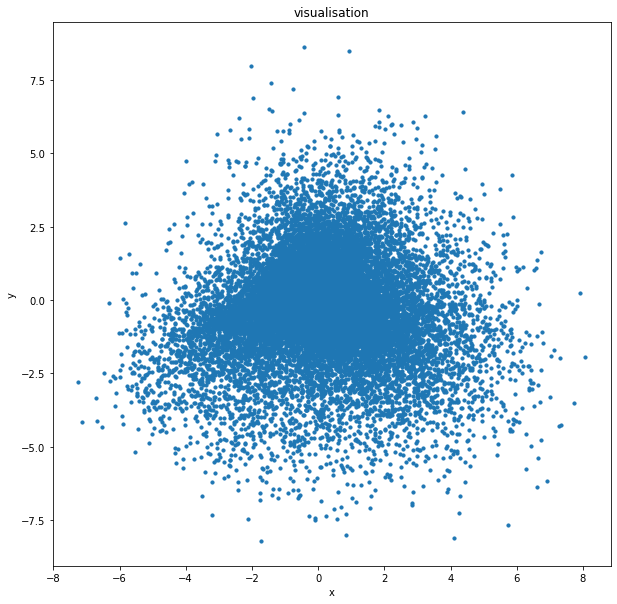

In [47]:
visualize.plot_scatter()
plt.show()

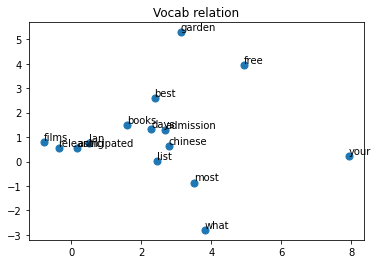

In [48]:
visualize.plot_scatter_words(Size=15)

Thankyou!!